In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Função para exibir imagens no notebook
def show_image(title, img, cmap_type='gray'):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.imshow(img, cmap=cmap_type)
    plt.axis('off')
    plt.show()


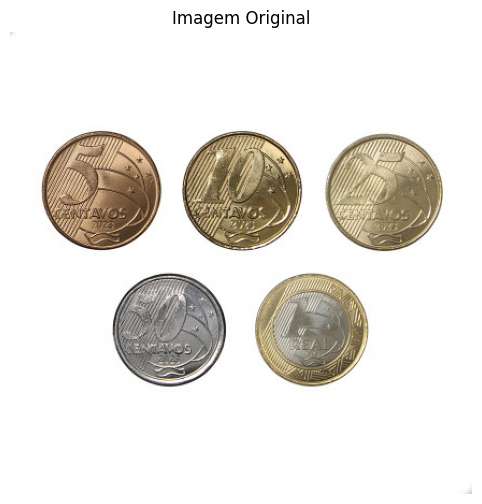

In [61]:
# Carregar a imagem de entrada
img_path = '/Users/arthurcury/Desktop/estudos_imagem/Computer_Vision_Studies/Photos/moedas.jpg'  # Substitua pelo caminho da sua imagem
img_rgb = cv2.imread(img_path)
assert img_rgb is not None, "file could not be read, check with os.path.exists()"

# Exibir a imagem original
show_image("Imagem Original", cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB), cmap_type=None)


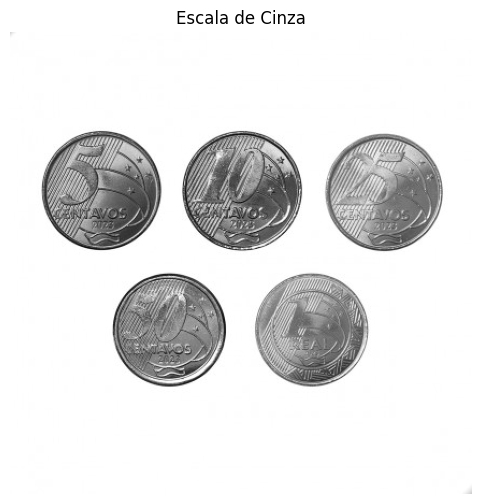

In [62]:
# Conversão para escala de cinza
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)

# Exibir a imagem em escala de cinza
show_image("Escala de Cinza", img_gray)


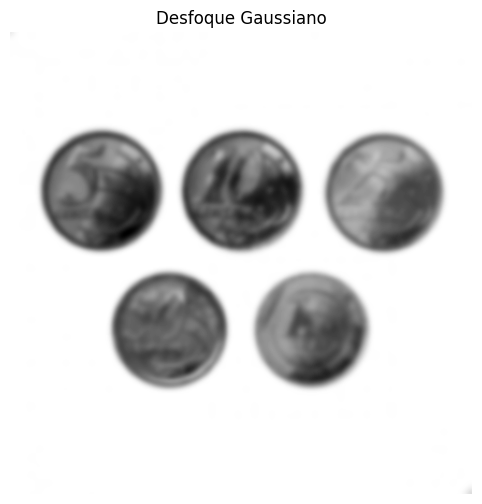

In [63]:
# Aplicar desfoque Gaussiano para suavizar a imagem
img_blur = cv2.GaussianBlur(img_gray, (15, 15), 0)

# Exibir a imagem suavizada
show_image("Desfoque Gaussiano", img_blur)


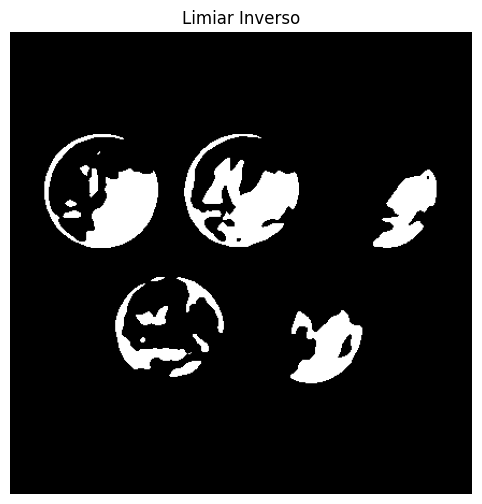

In [72]:
# Aplicar limiar inverso para binarizar a imagem
_, img_thresh = cv2.threshold(img_blur, 130, 255, cv2.THRESH_BINARY_INV)

# Exibir a imagem binarizada
show_image("Limiar Inverso", img_thresh)


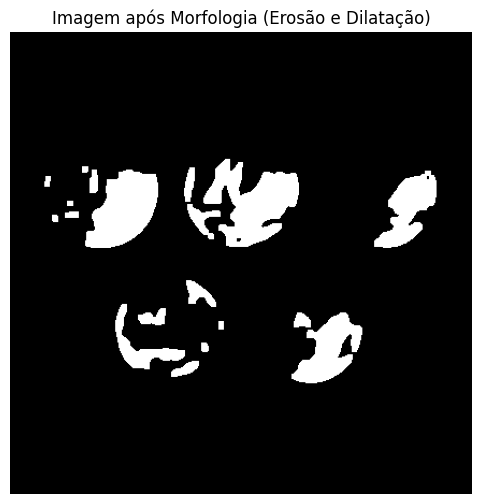

In [74]:
# Aplicar limiar inverso para binarizar a imagem
_, img_thresh = cv2.threshold(img_blur, 130, 255, cv2.THRESH_BINARY_INV)

# Exibir a imagem binarizada
show_image("Limiar Inverso", img_thresh)


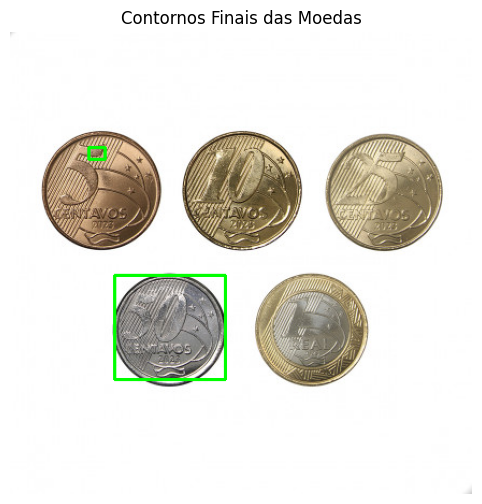

In [66]:
# Função para verificar se um contorno é circular (provavelmente uma moeda)
def is_circular(contour):
    perimeter = cv2.arcLength(contour, True)
    area = cv2.contourArea(contour)
    
    # Evitar divisão por zero
    if perimeter == 0:
        return False
    
    circularity = 4 * np.pi * (area / (perimeter ** 2))
    
    # Definindo um limiar de circularidade próximo de 1
    if circularity > 0.7:  # Ajuste o valor conforme necessário
        return True
    return False

# Encontrar e desenhar os contornos finais
contours, _ = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img_rgb.copy()
for cnt in contours:
    if is_circular(cnt):
        x, y, w, h = cv2.boundingRect(cnt)
        cv2.rectangle(img_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Exibir a imagem com os contornos das moedas
show_image("Contornos Finais das Moedas", cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB), cmap_type=None)


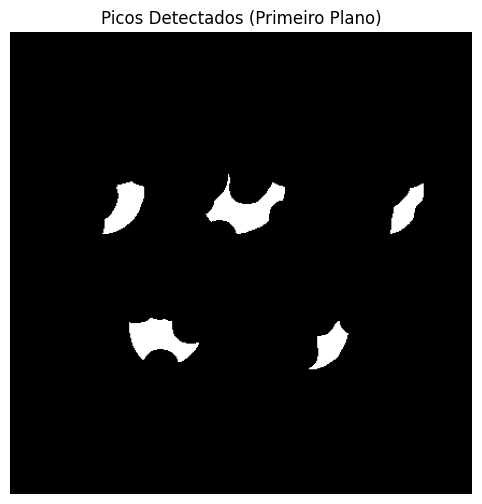

In [67]:
# Aplicar um novo limiar para obter os picos das moedas
_, sure_fg = cv2.threshold(dist_transform, 0.5 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)

# Exibir os picos detectados (primeiro plano)
show_image("Picos Detectados (Primeiro Plano)", sure_fg)


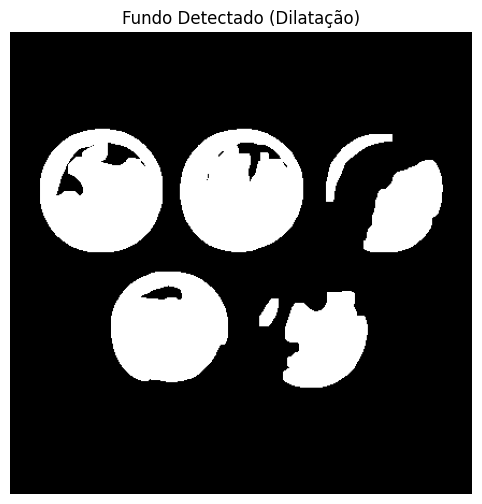

In [68]:
# Identificar o fundo da imagem
kernel = np.ones((3, 3), np.uint8)
sure_bg = cv2.dilate(img_thresh, kernel, iterations=3)

# Exibir a área do fundo
show_image("Fundo Detectado (Dilatação)", sure_bg)


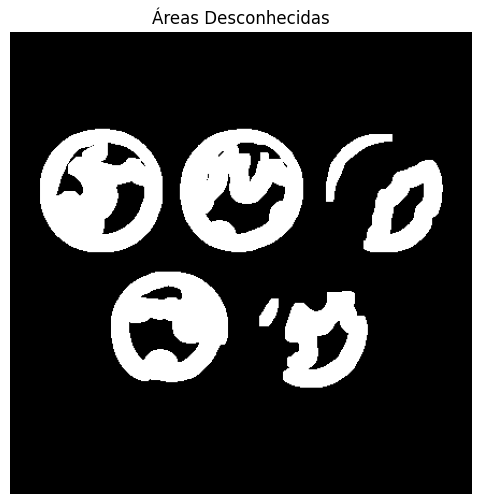

In [69]:
# Identificar áreas desconhecidas
unknown = cv2.subtract(sure_bg, sure_fg)

# Exibir as áreas desconhecidas
show_image("Áreas Desconhecidas", unknown)


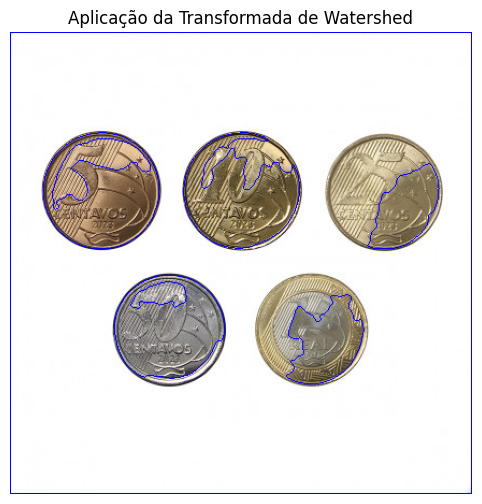

In [70]:
# Criar marcadores para a transformada de Watershed
_, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1
markers[unknown == 255] = 0

# Aplicar Watershed
img3 = cv2.cvtColor(img_thresh, cv2.COLOR_GRAY2BGR)
watershed_markers = cv2.watershed(img3, markers)
img_rgb_marked = img_rgb.copy()
img_rgb_marked[watershed_markers == -1] = [255, 0, 0]

# Exibir a imagem após Watershed
show_image("Aplicação da Transformada de Watershed", cv2.cvtColor(img_rgb_marked, cv2.COLOR_BGR2RGB), cmap_type=None)


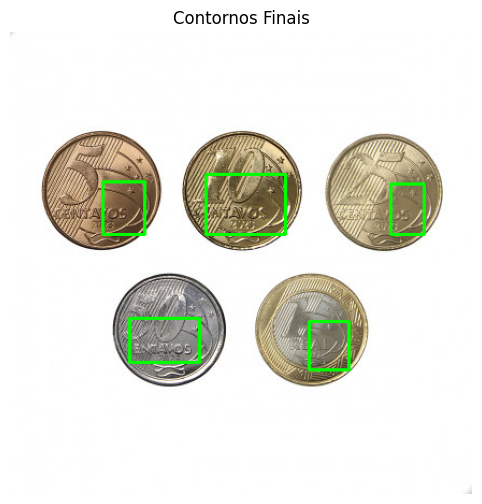

In [71]:
# Encontrar e desenhar os contornos finais
contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
img_contours = img_rgb.copy()
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(img_contours, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Exibir a imagem com os contornos finais
show_image("Contornos Finais", cv2.cvtColor(img_contours, cv2.COLOR_BGR2RGB), cmap_type=None)
